<a href="https://colab.research.google.com/github/KelvinLam05/bellabeat_case_study/blob/main/bellabeat_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This case study is the Capstone Project of **Google Data Analytics Professional Certificate**.

Title: Bellabeat Case Study

Author: Chee Hong Lam


**About the company**

Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

**Business task**

Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

**Business objectives**

1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Key stakeholders**

1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy

**Information on data source**

1. The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files.
2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
3. 30 FitBit users who consented to the submission of personal tracker data.
Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.
4. Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

**Limitations of data set**

1. Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. Sample size of 30 female FitBit users is not representative of the entire female population.
3. As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

**Is data ROCCC?**

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

1. Reliable - LOW - Not reliable as it only has 30 respondents
2. Original - LOW - Third party provider (Amazon Mechanical Turk)
3. Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. Current - LOW - Data is 6 years old and is not relevant
5. Cited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.



**Data selection**

The following files are selected and copied for analysis.

* daily_activity_merged.csv
* sleep_day_merged.csv
* hourly_steps_merged.csv
* hourly_calories_merged.csv

**Load packages and data**

In [246]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [247]:
# Load datasets
daily_activity = pd.read_csv('/content/daily_activity_merged.csv')
sleep_day = pd.read_csv('/content/sleep_day_merged.csv')
hourly_steps = pd.read_csv('/content/hourly_steps_merged.csv')
hourly_calories = pd.read_csv('/content/hourly_calories_merged.csv')

In [248]:
# Rename Pandas columns to lower case
daily_activity.columns = daily_activity.columns.str.lower()
sleep_day.columns = sleep_day.columns.str.lower()
hourly_steps.columns = hourly_steps.columns.str.lower()
hourly_calories.columns = hourly_calories.columns.str.lower()

In [249]:
# Examine the data
daily_activity.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [250]:
sleep_day.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [251]:
hourly_steps.head()

,id,activityhour,steptotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [252]:
hourly_calories.head()

,id,activityhour,calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [253]:
# Overview of all variables, their datatypes
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        940 non-null    int64  
 1   activitydate              940 non-null    object 
 2   totalsteps                940 non-null    int64  
 3   totaldistance             940 non-null    float64
 4   trackerdistance           940 non-null    float64
 5   loggedactivitiesdistance  940 non-null    float64
 6   veryactivedistance        940 non-null    float64
 7   moderatelyactivedistance  940 non-null    float64
 8   lightactivedistance       940 non-null    float64
 9   sedentaryactivedistance   940 non-null    float64
 10  veryactiveminutes         940 non-null    int64  
 11  fairlyactiveminutes       940 non-null    int64  
 12  lightlyactiveminutes      940 non-null    int64  
 13  sedentaryminutes          940 non-null    int64  
 14  calories  

In [254]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  413 non-null    int64 
 1   sleepday            413 non-null    object
 2   totalsleeprecords   413 non-null    int64 
 3   totalminutesasleep  413 non-null    int64 
 4   totaltimeinbed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [255]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22099 non-null  int64 
 1   activityhour  22099 non-null  object
 2   steptotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [256]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22099 non-null  int64 
 1   activityhour  22099 non-null  object
 2   calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


**Changing date strings to datetime**

Looking at the outputs above, we can see that the date column in all dataframes are of type object. We need to change the data type to datetime to perform calculations.

In [257]:
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
sleep_day['sleepday'] = pd.to_datetime(sleep_day['sleepday'])

In [258]:
hourly_steps['time'] = pd.to_datetime(hourly_steps['activityhour'])
hourly_calories['time'] = pd.to_datetime(hourly_calories['activityhour'])

Now we will use Series.dt.day_name() function to return the names of the day of each timestamp in the given series object.

In [259]:
daily_activity['dayofweek'] = daily_activity['activitydate'].dt.day_name()

In [260]:
# Delete the activityhour column
hourly_steps.drop(['activityhour'], axis = 1, inplace = True)
hourly_calories.drop(['activityhour'], axis = 1, inplace = True)

In [261]:
# Rename columns
daily_activity.rename(columns = {'activitydate': 'date'}, inplace = True)
sleep_day.rename(columns = {'sleepday': 'date'}, inplace = True)

**Examine the data**

In [262]:
daily_activity['id'].nunique()

33

In [263]:
sleep_day['id'].nunique()

24

In [264]:
hourly_steps['id'].nunique()

33

In [265]:
hourly_calories['id'].nunique()

33

From the above observation, noted that

* There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

* Only 24 runners have submitted their daily sleep.


The total days of smart devices usage by user and average number of days that all runners tracked their activity are, respectively:

In [266]:
starting_date_and_an_ending_date = daily_activity.groupby('id').agg(minimum_date = ('date', np.min), maximum_date = ('date', np.max)).reset_index()

In [267]:
# Total days of smart devices usage by user
starting_date_and_an_ending_date['usage_days'] = starting_date_and_an_ending_date['maximum_date'] - starting_date_and_an_ending_date['minimum_date']

In [268]:
starting_date_and_an_ending_date[['id', 'usage_days']]

,id,usage_days
0,1503960366,30 days
1,1624580081,30 days
2,1644430081,29 days
3,1844505072,30 days
4,1927972279,30 days
5,2022484408,30 days
6,2026352035,30 days
7,2320127002,30 days
8,2347167796,17 days
9,2873212765,30 days


In [269]:
# Average number of days that all runners tracked their activity
print(starting_date_and_an_ending_date['usage_days'].mean().days)

27


**The Average of Total Steps**

In [270]:
# Summary statistics
daily_activity[['totalsteps']].describe()

,totalsteps
count,940.000000
mean,7637.910638
std,5087.150742
min,0.000000
25%,3789.750000
50%,7405.500000
75%,10727.000000
max,36019.000000


As we can see, the average of total daily steps by the users is **7,638 steps**. According to a study conducted in 2011 by [BMC/BioMed Central](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79), taking 10,000 steps a day is a reasonable target for healthy adults, helping reduce certain health conditions, such as high blood pressure and heart disease. To help users achieve the recommended number of steps, alarms or notifications can be triggered via the smart device. These reminders can encourage users to clock in more steps throughout the day.

**Frequency of Usage Across the Week**

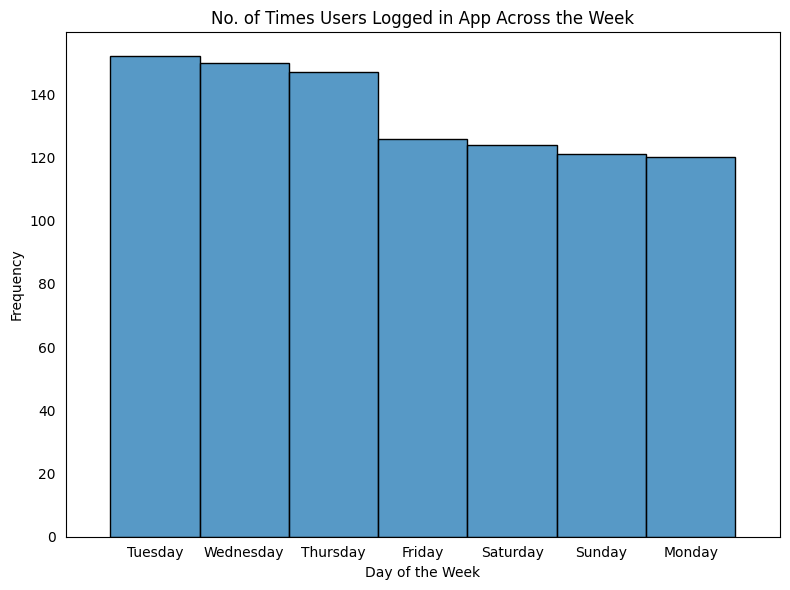

In [271]:
plt.style.use('default')
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.histplot(daily_activity['dayofweek'], bins = np.arange(8) - 0.5, edgecolor = 'black', linewidth = 1)
ax.set(title = 'No. of Times Users Logged in App Across the Week', xlabel = 'Day of the Week', ylabel = 'Frequency')

plt.tick_params(left = False, bottom = False)
plt.xticks(range(7))
plt.xlim([-1, 7])
plt.show()

In the above histogram we can determine the following:

* We discovered that users prefer or remember to track their activity on the app during midweek from Tuesday to Thursday.

* Noting that the frequency dropped on Friday and continue on weekends and Monday.

* Adding feature of reminding consumer to wear the tracker in case of no-use may attract consumers who often forget to put on the gadget.

* Rewards-program to incentivize consistent users may encourage regular use of Bellabeat app.

* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.


**Percentage of Activity in Minutes**

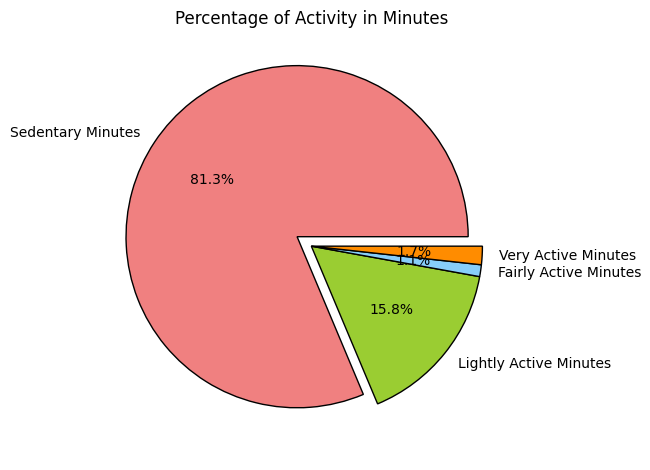

In [272]:
sedentary_minutes = daily_activity['sedentaryminutes'].sum()
lightly_active_minutes = daily_activity['lightlyactiveminutes'].sum()
fairly_active_minutes = daily_activity['fairlyactiveminutes'].sum()
very_active_minutes = daily_activity['veryactiveminutes'].sum()

slices = [sedentary_minutes, lightly_active_minutes, fairly_active_minutes, very_active_minutes]
labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
colours = ['lightcoral', 'yellowgreen', 'lightskyblue', 'darkorange']
explode = [0.1, 0, 0, 0]

plt.pie(slices, labels = labels, colors = colours, wedgeprops = {'edgecolor': 'black'}, explode = explode, autopct = '%1.1f%%')
plt.title('Percentage of Activity in Minutes')
plt.tight_layout()
plt.show()

As seen from the pie chart,

* Sedentary minutes takes the biggest slice at 81.3%.

* This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

* App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

The CDC recommends working out with a friend in order to feel more motivated, be more adventurous in trying workouts, and to become consistent. The CDC even recommends the use of a social media workout app to connect with friends and reach your goals. The Bellabeat app could become that social media workout app that women turn to, by creating a sisterhood of supportive women ready to prioritize their health.

**Average Steps per Hour**

Let's look at how active the users are per hourly in total steps.

In [273]:
# Combining datasets 
hourly_steps_and_calories_merged_data = pd.merge(hourly_steps, hourly_calories, on = ['id', 'time'])

In [274]:
hourly_steps_and_calories_merged_data['time'] = pd.to_datetime(hourly_steps_and_calories_merged_data['time']).dt.time

In [275]:
average_total_steps = hourly_steps_and_calories_merged_data.groupby(['time'])['steptotal'].mean().reset_index()

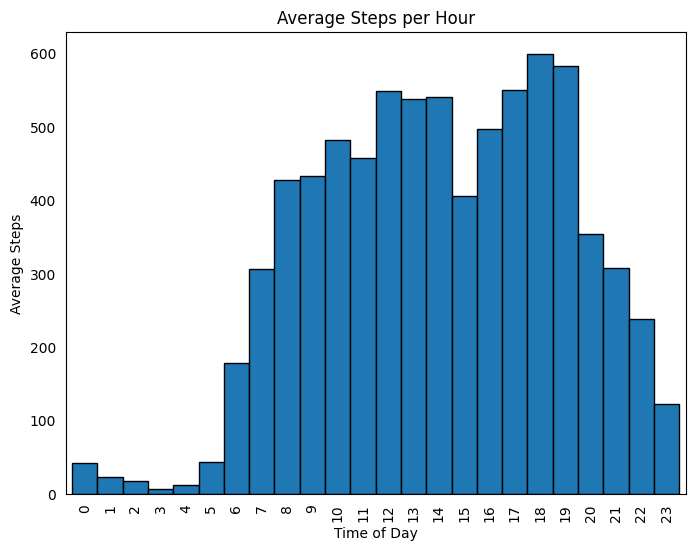

In [276]:
average_total_steps.plot(figsize = (8, 6), kind = 'bar', edgecolor = 'black', width = 1.0, title = 'Average Steps per Hour', xlabel = 'Time of Day', ylabel = 'Average Steps', legend = False)

plt.tick_params(left = False, bottom = False)

Users takes the most steps from 5 PM to 7 PM. Bellabeat can use this time to remind and motivate users to go for a run or walk.

**Minutes Asleep vs. Total Steps**

In [277]:
# Combining datasets 
daily_activity_and_sleep_day_merged_data = daily_activity.merge(sleep_day, on = ['id', 'date'])

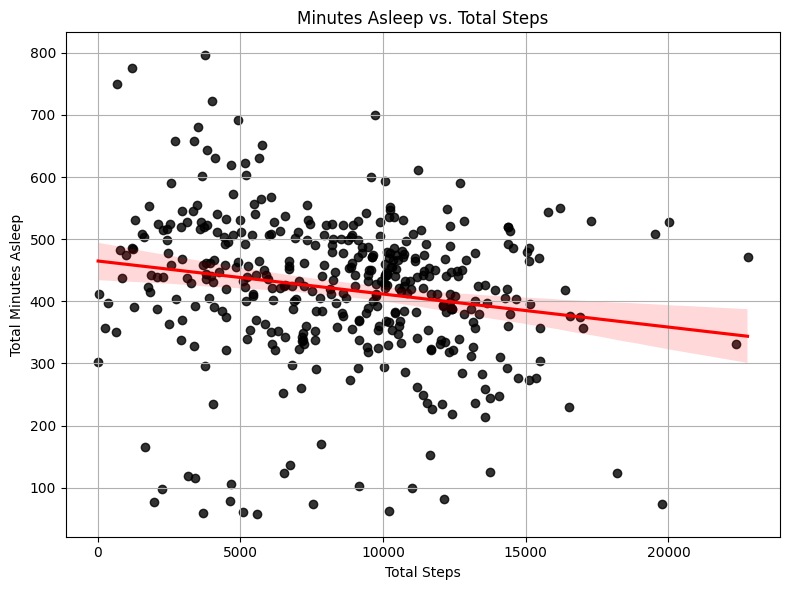

In [278]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalsteps', y = 'totalminutesasleep', data = daily_activity_and_sleep_day_merged_data, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Minutes Asleep vs. Total Steps', xlabel = 'Total Steps', ylabel = 'Total Minutes Asleep')

plt.grid(True)
plt.show()

Users who move more through the day and tend to exercise longer, tend to sleep less. Therefore, Bellabeat could offer their customers reminders about upcoming sleep time or even relaxing playlists in order to get ready for bedtime.

**Active Minutes vs. Calories Burned**

In [279]:
daily_activity['totalactiveminutes'] = daily_activity['lightlyactiveminutes'] + daily_activity['fairlyactiveminutes'] + daily_activity['veryactiveminutes']

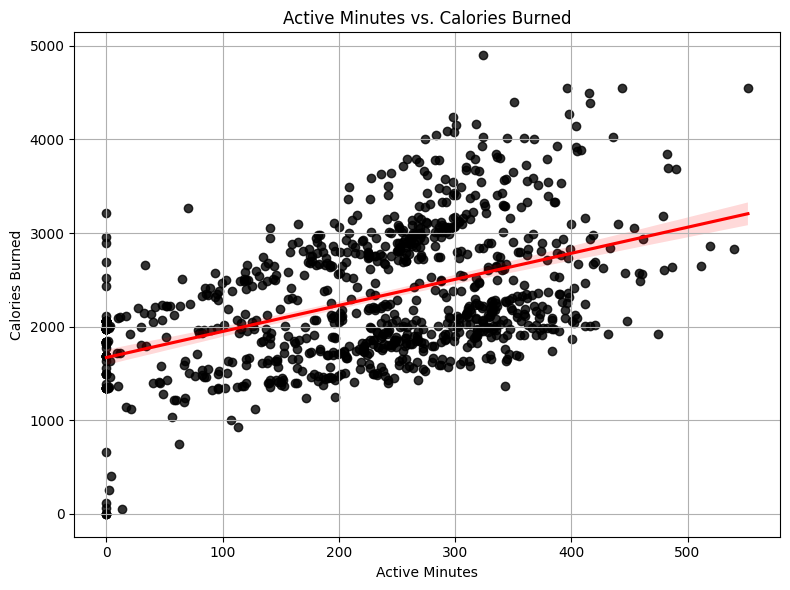

In [280]:
plt.figure(figsize = (8, 6), tight_layout = True)

ax = sns.regplot(x = 'totalactiveminutes', y = 'calories', data = daily_activity, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
ax.set(title = 'Active Minutes vs. Calories Burned', xlabel = 'Active Minutes', ylabel = 'Calories Burned')

plt.grid(True)
plt.show()

From the scatter plot above, we can see that active minutes has a postive correlation with calories burned. Introducing different type of workout at all fitness levels, home workouts for those who work from home or simple 10 minutes short workout for those who have a very busy lifestyle to encourage users to stay active through their workweeks.